In [1]:
import tensorflow as tf
from tensorflow import keras as keras
print(tf.__version__)

print(keras.__version__)

2.3.1
2.4.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Zad 
Pibierz zbiór danych

In [5]:
from tensorflow.keras.datasets import mnist
from tensorflow.python.keras.utils import np_utils
# from scipy.misc import toimage

import numpy as np

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()


# X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
# X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

print(X_train.shape)
print(X_test.shape)
print(np.unique(y_train,return_counts=True))
print(X_train[0].shape)

nb_classes = len(np.unique(y_train))
n_samples = X_train.shape[0]

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
      dtype=int64))
(28, 28, 1)


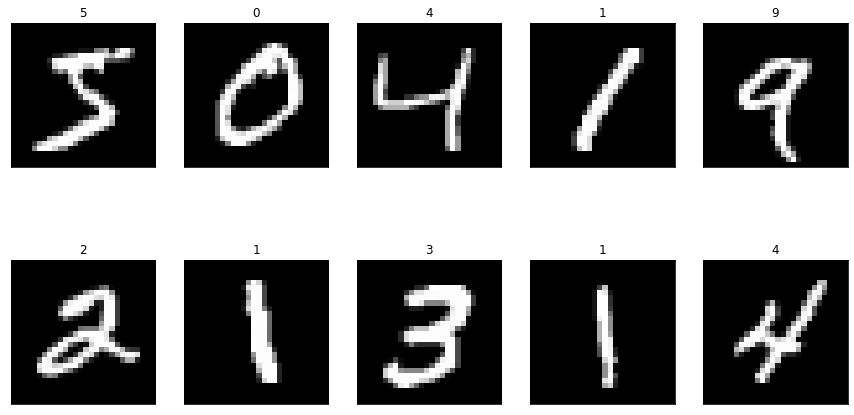

In [6]:
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(y_train, X_train, axes.ravel()):
    ax.imshow(image.reshape(28, 28), cmap=plt.cm.gist_gray)
    ax.set_title(target)
plt.show() 

In [7]:
np.max(X_train[0])

255

### Normalize

In [8]:
# normalize inputs from 0-255 to 0.0-1.0

X_train = X_train/255
X_test = X_test/255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

num_classes = y_test.shape[1]

X_train[0].shape

(28, 28, 1)

In [9]:
np.max(X_train[0])

1.0

# Zad
Przekopiuj architekturę:

https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.python.keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.callbacks import History

In [11]:
history_1 = History()
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=X_train[0].shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [12]:
early_stopping = EarlyStopping(patience=3,monitor="val_loss")
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
model.fit(X_train, y_train, validation_split=0.25,epochs=100,callbacks=[early_stopping, history_1])
model.evaluate(X_test,y_test)

Epoch 1/100
1407/1407 [==============================] - 103s 73ms/step - loss: 0.2161 - accuracy: 0.9333 - val_loss: 0.0692 - val_accuracy: 0.9799
Epoch 2/100
1407/1407 [==============================] - 83s 59ms/step - loss: 0.0896 - accuracy: 0.9732 - val_loss: 0.0496 - val_accuracy: 0.9856
Epoch 3/100
1407/1407 [==============================] - 81s 58ms/step - loss: 0.0694 - accuracy: 0.9786 - val_loss: 0.0454 - val_accuracy: 0.9871
Epoch 4/100
1407/1407 [==============================] - 83s 59ms/step - loss: 0.0547 - accuracy: 0.9830 - val_loss: 0.0430 - val_accuracy: 0.9879
Epoch 5/100
1407/1407 [==============================] - 100s 71ms/step - loss: 0.0471 - accuracy: 0.9852 - val_loss: 0.0425 - val_accuracy: 0.9871
Epoch 6/100
1407/1407 [==============================] - 91s 64ms/step - loss: 0.0403 - accuracy: 0.9877 - val_loss: 0.0433 - val_accuracy: 0.9895
Epoch 7/100
1407/1407 [==============================] - 103s 73ms/step - loss: 0.0343 - accuracy: 0.9888 - val_loss

[0.031238054856657982, 0.991599977016449]

In [13]:
model.predict_proba(X_test)

Instructions for updating:
Please use `model.predict()` instead.


array([[6.2832464e-15, 1.1958645e-11, 2.9751486e-11, ..., 1.0000000e+00,
        1.3904037e-14, 4.8180199e-11],
       [8.4252195e-11, 2.2854438e-09, 1.0000000e+00, ..., 5.1915971e-15,
        3.4033188e-14, 1.8051503e-17],
       [2.1133572e-11, 1.0000000e+00, 8.9891765e-09, ..., 2.4589342e-09,
        2.0022703e-09, 6.8548826e-11],
       ...,
       [4.8489280e-16, 1.5846929e-10, 1.2684919e-12, ..., 7.9361656e-11,
        4.0342494e-09, 9.8480641e-08],
       [4.1857457e-18, 1.8294880e-19, 4.0344410e-21, ..., 8.9366525e-18,
        3.5711814e-10, 1.0968365e-15],
       [1.2936239e-09, 1.6523252e-12, 1.4593817e-09, ..., 5.0193849e-16,
        9.6049280e-10, 3.8449213e-13]], dtype=float32)

In [14]:
model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

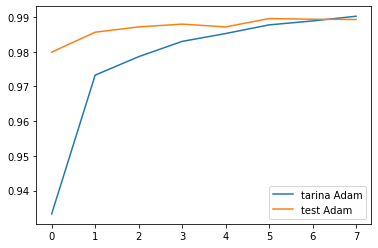

In [15]:
plt.plot(history_1.history['accuracy'], label = "tarina Adam")
plt.plot(history_1.history['val_accuracy'], label = "test Adam")


plt.legend()
plt.show()